<a href="https://colab.research.google.com/github/spandanag333/ML_Projects/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df=pd.read_csv('/content/heights.csv')
df.head()

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1


### **detect outliner**

In [ ]:
max_treshold=df['height'].quantile(0.95)
max_treshold

7.4799999999999995

In [ ]:
df[df['height']>max_treshold]

,name,height
11,ramesh,8.0


In [ ]:
min_treshold=df['height'].quantile(0.05)
min_treshold

3.6050000000000004

In [ ]:
df[df['height']<min_treshold]

,name,height
7,anil,1.2


In [ ]:
#remove outliners
df[(df['height']<max_treshold) & (df['height']>min_treshold)]

,name,height
0,mohit,5.3
1,sakshi,5.2
2,arun,5.1
3,varun,4.9
4,ani,7.1
5,amit,6.4
6,amita,6.5
8,sudha,6.0
9,ram,5.1
10,kamal,5.6


In [ ]:
import pandas as pd
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
df.isnull()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...
13315,False,False,False,False,False,False,False,False,False
13316,False,False,False,False,True,False,False,True,False
13317,False,False,False,False,False,False,False,False,False
13318,False,False,False,False,False,False,False,False,False


In [ ]:
df.shape

(13320, 9)

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [ ]:
df=df.drop('area_type',axis='columns')
df.shape


(13320, 8)

In [ ]:
df.dtypes

availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
bmin,bmax=df['price'].quantile([0.001,0.999])
bmin,bmax

(11.159500000000001, 2000.0)

In [ ]:
df[df['price']<bmin]

,availability,location,size,society,total_sqft,bath,balcony,price
171,Ready To Move,Attibele,1 BHK,Jae 1hu,450,1.0,1.0,11.00
942,Ready To Move,Attibele,1 BHK,Jae 2hu,400,1.0,1.0,11.00
1471,18-Mar,Kengeri,1 BHK,NaN,340,1.0,1.0,10.00
2437,Ready To Move,Attibele,1 BHK,Jae 1hu,395,1.0,1.0,10.25
4113,18-Jan,BTM Layout,3 BHK,NaN,167Sq. Meter,3.0,2.0,10.00
5410,Ready To Move,Attibele,1 BHK,Jae 1hu,400,1.0,1.0,10.00
7482,Ready To Move,Alur,1 BHK,NaN,470,2.0,1.0,10.00
8594,Ready To Move,Chandapura,1 BHK,NaN,450,1.0,1.0,9.00
8653,Ready To Move,Doddaballapur,2 Bedroom,NaN,640,1.0,0.0,10.50
10526,Ready To Move,Yelahanka New Town,1 BHK,KHatsFl,284,1.0,1.0,8.00


In [ ]:
df[df['price']<bmax]

,availability,location,size,society,total_sqft,bath,balcony,price
0,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...
13315,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


### **remove outliers**

In [ ]:
data=df[(df['price']<bmax)&(df['price']>bmin)]
data.shape

(13291, 8)

In [ ]:
df.shape

(13320, 8)

**zscore**

In [ ]:
import seaborn as sns


In [ ]:
realtion=data.corr()

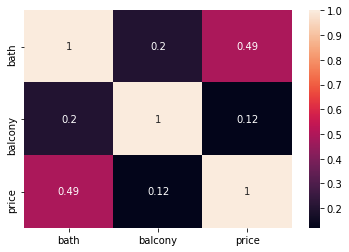

In [ ]:
sns.heatmap(realtion,annot=True)

In [ ]:
import pandas as pd
df=pd.read_csv('/content/heights.csv')
df['zscore']=(df['height']-df['height'].mean())/df['height'].std()
df
#0.89 std away from me


,name,height,zscore
0,mohit,5.3,-0.238392
1,sakshi,5.2,-0.301363
2,arun,5.1,-0.364335
3,varun,4.9,-0.490278
4,ani,7.1,0.895094
5,amit,6.4,0.454294
6,amita,6.5,0.517265
7,anil,1.2,-2.820220
8,sudha,6.0,0.202408
9,ram,5.1,-0.364335


KeyError: ignored